### NAME: Nikhil Kumbhare

# Task - 2: Unemployment Analysis with Python

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go 
import plotly.express as ps

In [34]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [35]:
df.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [36]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Data Preprocessing

#### 1. Data Cleaning:

In [38]:
df.isnull().sum() #Checking for Null Values

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [39]:
df.columns = df.columns.str.strip()
df = df.drop_duplicates(['Date','Region'])

In [40]:
df = df.drop_duplicates()

In [41]:
# Convert the "Date" Column to DateTime Format 
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_12360\1992330599.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [42]:
# Set the "Data" column as the index
df.set_index("Date", inplace = True)

In [43]:
df.shape

(267, 8)

### 2. Data Reshaping

In [44]:
df.tail(2)

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-09-30,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855
2020-10-31,West Bengal,M,9.98,33962549,45.63,East,22.9868,87.855


In [45]:
df.rename(columns = {"Region" : "State"}, inplace = True)

In [46]:
df.tail(2)

,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-09-30,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855
2020-10-31,West Bengal,M,9.98,33962549,45.63,East,22.9868,87.855


In [47]:
# calculate average unemployment rate by state
average_unemployment_rate = df.groupby("State")["Estimated Unemployment Rate (%)"].mean()

### State with Highest Unemployment Rate 

In [48]:
# Find the State with the highest unemployment rate 
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [49]:
print("State with the Highest unemployment rate:", state_with_highest_unemployment)
print("Highest umemployment rate: ", highest_unemployment_rate)      

State with the Highest unemployment rate: Haryana
Highest umemployment rate:  27.476999999999997


### State with Lowest Unemployment Rate

In [50]:
# Find the State with the lowest unemployment rate 
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [51]:
print("State with the Lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest umemployment rate: ", lowest_unemployment_rate)      

State with the Lowest unemployment rate: Meghalaya
Lowest umemployment rate:  3.8659999999999997


### Data Visualization

#### a. Line plot showing unemployment rate over time

In [52]:
df1 = df[~df.index.duplicated(keep = "first")]

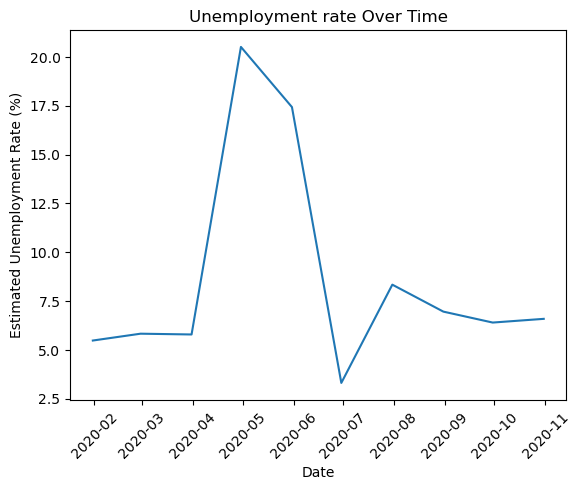

In [53]:
sns.lineplot(x = "Date", y = "Estimated Unemployment Rate (%)",  data = df1)
plt.xticks(rotation = 45)
plt.title("Unemployment rate Over Time")
plt.show()

#### b. Bar plot display average unemployment rate by state

In [54]:
df.tail()

,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,
2020-06-30,West Bengal,M,7.29,30726310,40.39,East,22.9868,87.855
2020-07-31,West Bengal,M,6.83,35372506,46.17,East,22.9868,87.855
2020-08-31,West Bengal,M,14.87,33298644,47.48,East,22.9868,87.855
2020-09-30,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855
2020-10-31,West Bengal,M,9.98,33962549,45.63,East,22.9868,87.855


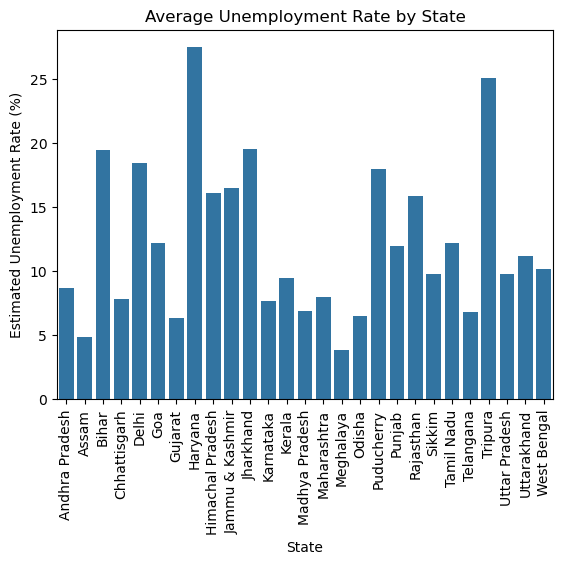

In [55]:
state_avg_unemployment = df.groupby("State")["Estimated Unemployment Rate (%)"].mean().reset_index()
    
# Create a bar plot
sns.barplot(x="State", y="Estimated Unemployment Rate (%)", data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by State")
plt.show()

#### c. Scatter plot showing thr relationship between unemployment rate and labour Participation rate:

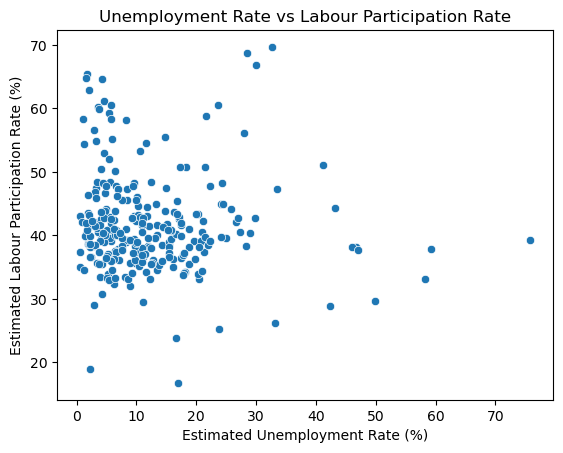

In [67]:
sns. scatterplot(x="Estimated Unemployment Rate (%)", y = "Estimated Labour Participation Rate (%)", data = df)
plt.title("Unemployment Rate vs Labour Participation Rate")
plt.show()

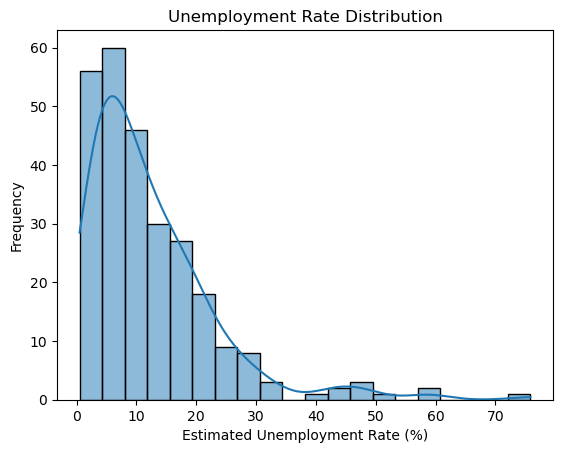

In [69]:
sns.histplot(df["Estimated Unemployment Rate (%)"], bins = 20, kde = True)
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.title("Unemployment Rate Distribution")
plt.show()

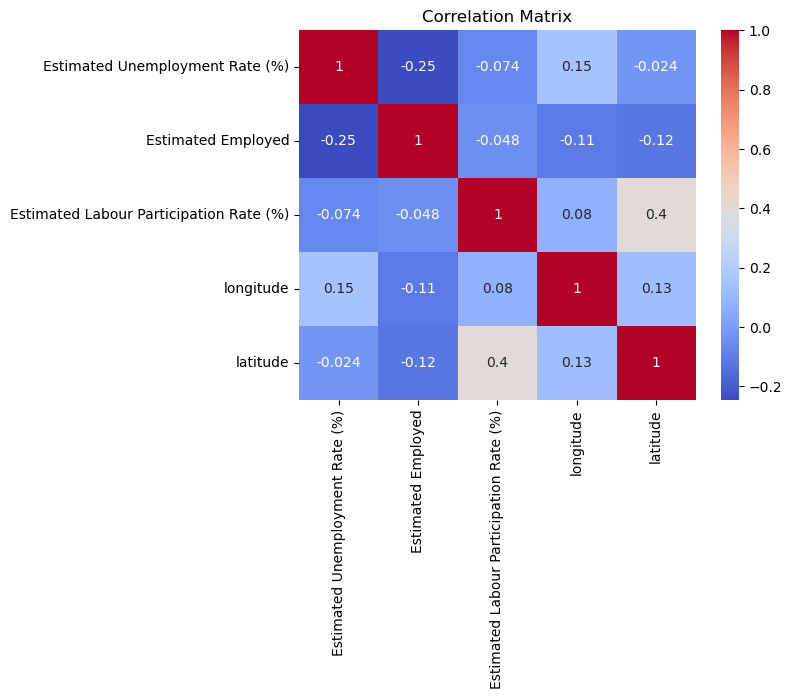

In [80]:
df_numerical = df.select_dtypes(include=['number'])

correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()